In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
def read_data(file):
    df = pd.read_csv(file)
    return df

In [4]:
def get_total_pitstop(pitstop_table):
    pitstop_df = pd.DataFrame(columns=["raceId","driverId","stop"])
    for line in range(0,len(pitstop_table)):
        df_stop = pitstop_df.loc[(pitstop_df["raceId"] == int(pitstop_table.loc[line, "raceId"])) & (pitstop_df["driverId"] == int(pitstop_table.loc[line, "driverId"])), ["stop"]]
        if len(df_stop) > 0:
            stop_list = df_stop.values.tolist()
            if int(pitstop_table.loc[line, "stop"]) > stop_list[0][0]:
                pitstop_df.loc[(pitstop_df["raceId"] == int(pitstop_table.loc[line, "raceId"])) & (pitstop_df["driverId"] == int(pitstop_table.loc[line, "driverId"])), "stop"] = int(pitstop_table.loc[line, "stop"])
        else:
            pitstop_df = pitstop_df.append(
                {"raceId": int(pitstop_table.loc[line, "raceId"]), "driverId": int(pitstop_table.loc[line, "driverId"]),
                 "stop": int(pitstop_table.loc[line, "stop"])}, ignore_index=True)
    return pitstop_df

In [202]:
def delete_null(df, column, value):
    index_name = df[df["position"] == "\\N"].index
    #print(df.loc[8, "position"] == "\\N")
    df.drop(index=index_name, inplace=True)
    return df

In [235]:
def turn_column_num(df, column):
    df[column] = df[column].astype(int)
    return df

In [236]:
pitstops_file = read_data("data/pit_stops.csv")

In [237]:
results_file = read_data("data/results.csv")

In [238]:
clean_result = delete_null(results_file, "positionText", "R")

In [239]:
clean_result

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24973,24979,1052,847,3,63,15,14,14,14,0.0,55,\N,\N,40,12,1:35.036,205.008,11
24974,24980,1052,20,117,5,20,15,15,15,0.0,55,\N,\N,26,16,1:35.566,203.871,11
24975,24981,1052,854,210,47,18,16,16,16,0.0,55,\N,\N,38,18,1:36.134,202.667,11
24976,24982,1052,842,213,10,5,17,17,17,0.0,52,\N,\N,48,5,1:34.090,207.069,31


In [250]:
num_result = turn_column_num(clean_result, "position")

In [251]:
num_result

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24973,24979,1052,847,3,63,15,14,14,14,0.0,55,\N,\N,40,12,1:35.036,205.008,11
24974,24980,1052,20,117,5,20,15,15,15,0.0,55,\N,\N,26,16,1:35.566,203.871,11
24975,24981,1052,854,210,47,18,16,16,16,0.0,55,\N,\N,38,18,1:36.134,202.667,11
24976,24982,1052,842,213,10,5,17,17,17,0.0,52,\N,\N,48,5,1:34.090,207.069,31


In [252]:
total_pitstop = get_total_pitstop(pitstops_file)

In [253]:
total_pitstop

,raceId,driverId,stop
0,841,153,3
1,841,30,2
2,841,17,3
3,841,4,3
4,841,13,3
...,...,...,...
3908,1052,832,2
3909,1052,852,2
3910,1052,822,3
3911,1052,830,2


In [254]:
def join_table(table_a, table_b, key_list):
    joined_table = table_a.merge(table_b, on=key_list)
    return joined_table

In [255]:
result_pitstop = join_table(total_pitstop, num_result,["raceId","driverId"])

In [256]:
result_pitstop

,raceId,driverId,stop,resultId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,841,153,3,20789,5,19,12,11,11,11,0.0,57,\N,\N,41,10,1:30.467,211.025,11
1,841,17,3,20783,9,2,3,5,5,5,10.0,58,+38.171,5408430,50,3,1:29.600,213.066,1
2,841,4,3,20782,6,5,5,4,4,4,12.0,58,+31.772,5402031,49,2,1:29.487,213.336,1
3,841,13,3,20785,6,6,8,7,7,7,6.0,58,+1:25.186,5455445,55,1,1:28.947,214.631,1
4,841,20,2,20779,9,1,1,1,1,1,25.0,58,1:29:30.259,5370259,44,4,1:29.844,212.488,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,1052,832,2,24973,6,55,8,8,8,8,4.0,56,+67.100,5590997,48,7,1:34.509,206.151,1
3481,1052,852,2,24974,213,22,13,9,9,9,2.0,56,+85.692,5609589,38,8,1:34.761,205.603,1
3482,1052,822,3,24968,131,77,3,3,3,3,16.0,56,+37.383,5561280,56,1,1:32.090,211.566,1
3483,1052,830,2,24967,9,33,1,2,2,2,18.0,56,+0.745,5524642,41,2,1:33.228,208.984,1


In [276]:
result_stop = result_pitstop[["stop","position"]]

<AxesSubplot:xlabel='stop', ylabel='position'>

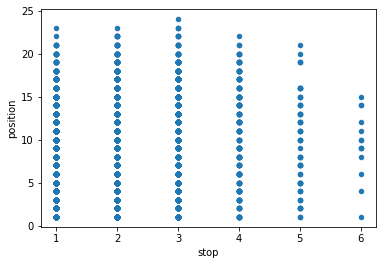

In [284]:
result_stop.plot.scatter(x='stop', y='position')

<AxesSubplot:title={'center':'position'}, xlabel='[stop]'>

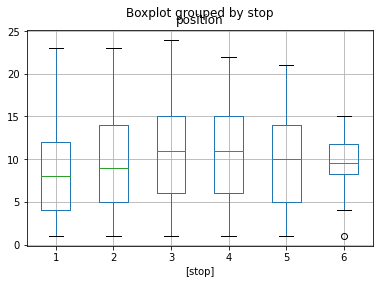

In [310]:
result_stop.boxplot(by="stop")

In [300]:
one_stop = result_pitstop.loc[result_stop["stop"] == 1]

<AxesSubplot:>

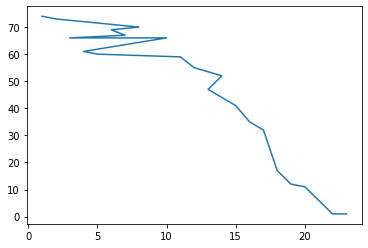

In [302]:
one_stop["position"].value_counts().plot()

In [303]:
two_stop = result_pitstop.loc[result_stop["stop"] == 2]

<AxesSubplot:>

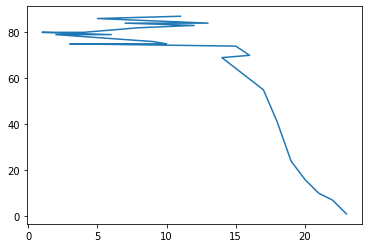

In [304]:
two_stop["position"].value_counts().plot()

In [307]:
three_stop = result_pitstop.loc[result_stop["stop"] == 3]

<AxesSubplot:>

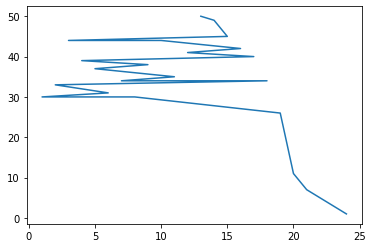

In [308]:
three_stop["position"].value_counts().plot()